# Into to stan
Justyna Gibas 403122

In [17]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

F = len('Justyna')
L = len('Gibas')

## Excercise 1 - Generated Quantities Block


In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/DA_2023/lab2/code_1.stan to exe file /home/DA_2023/lab2/code_1
INFO:cmdstanpy:compiled model executable: /home/DA_2023/lab2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DA_2023/lab2/code_1.hpp /home/DA_2023/lab2/code_1.stan
Warning in '/home/DA_2023/lab2/code_1.stan', line 7, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_m

In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_14405/3431436027.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist_data.hist(ax=ax)


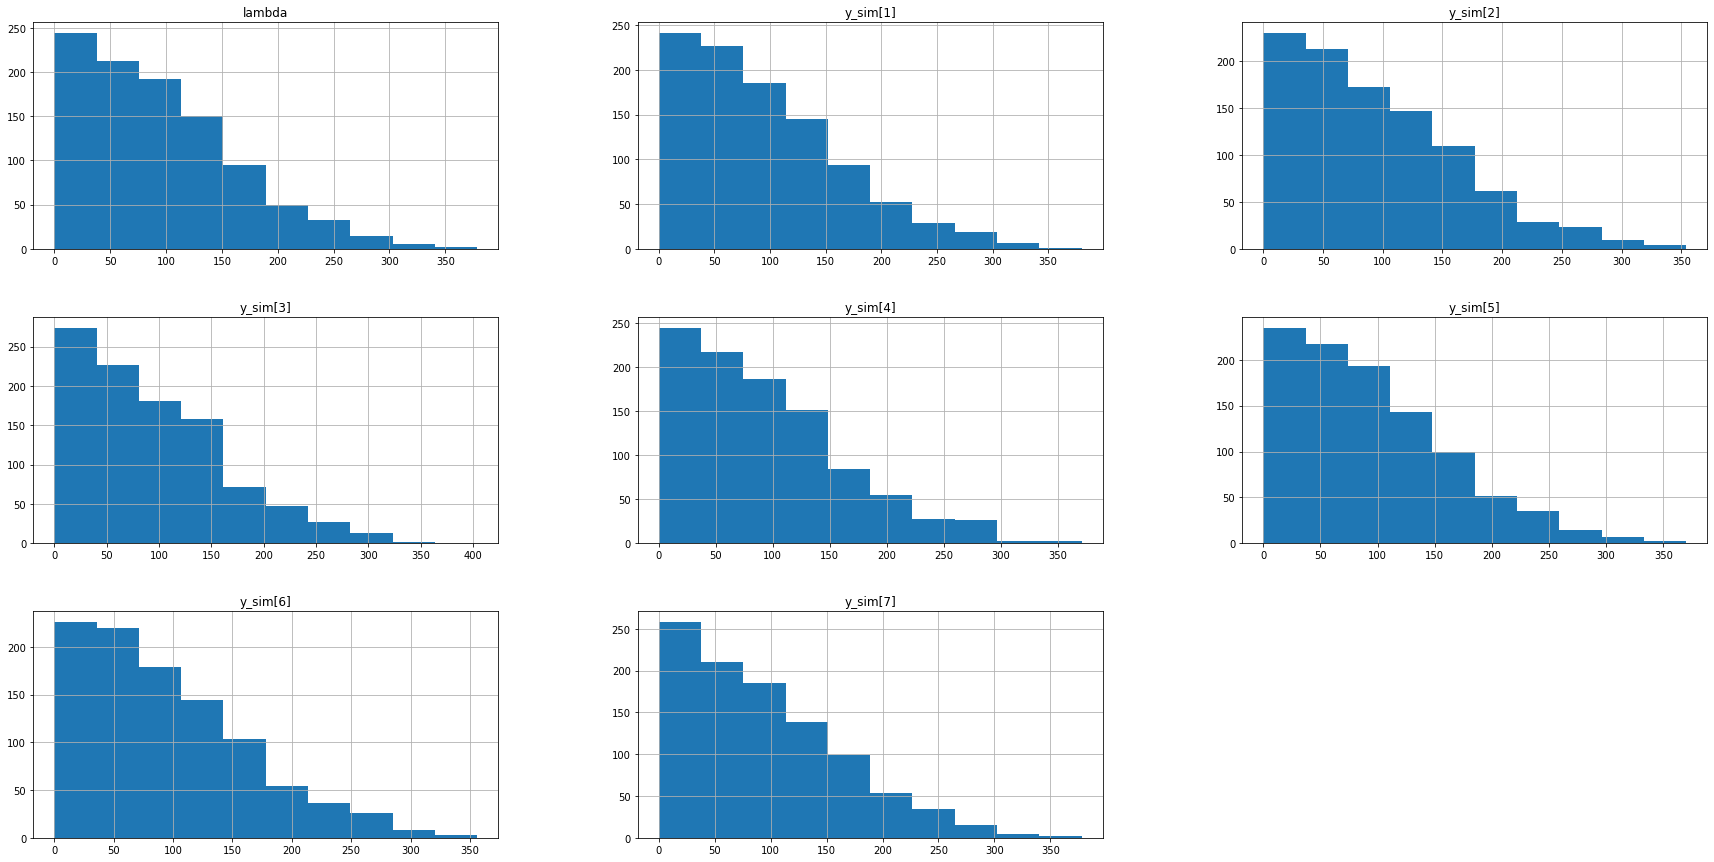

In [86]:
df = pd.DataFrame(samples.draws_pd())
hist_columns_names = ['lambda'] + ['y_sim[{}]'.format(i) for i in range(1,F+1)]
hist_data = df[hist_columns_names]
figure, ax = plt.subplots(figsize=(30,15))
hist_data.hist(ax=ax)
plt.show()

## Excercise 2 - Constraints on the data


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


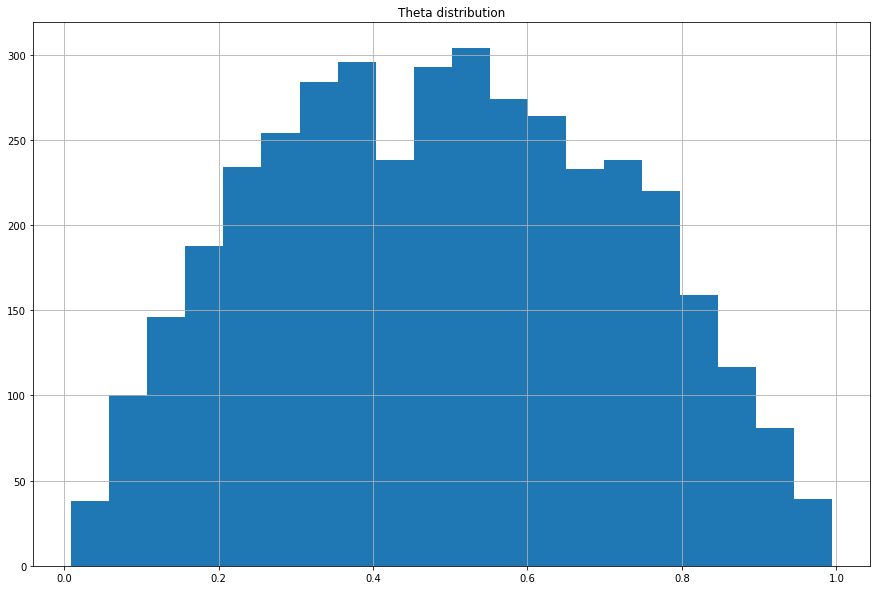

In [47]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df = pd.DataFrame(samp_bern1.draws_pd())
plt.figure(figsize=(15,10))
plt.hist(df['theta'], bins=20)
plt.grid()
plt.title('Theta distribution')
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


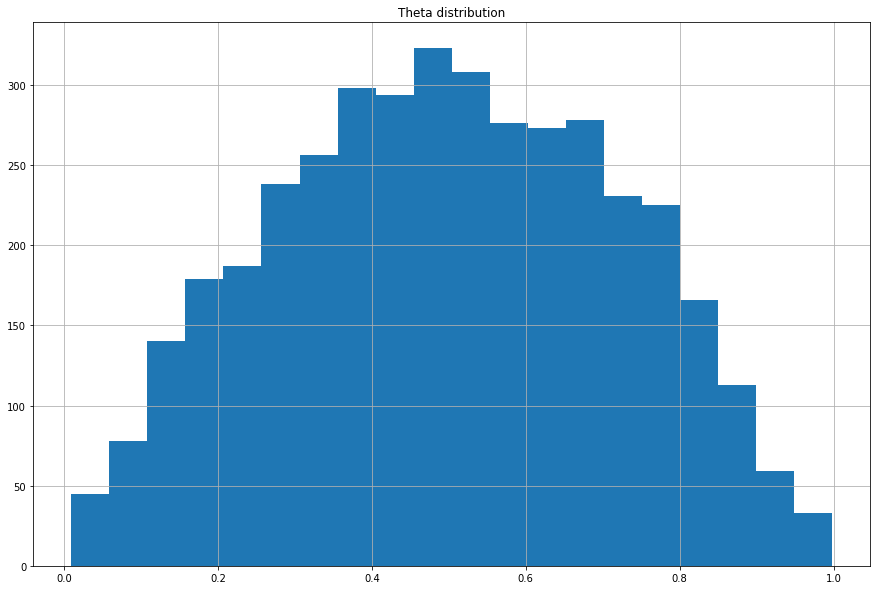

In [48]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df = pd.DataFrame(samp_bern2.draws_pd())
plt.figure(figsize=(15,10))
plt.hist(df['theta'], bins=20)
plt.grid()
plt.title('Theta distribution')
plt.show()

In both examples error occured due to 'y':[0,2]. After changing it to 'y':[0,1] it works. Distributions look pretty much the same. 

## Excercise 3 - Constraints on parameters


### Unconstrained parameters


In [54]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▏         | 00:00 Status

chain 1 |█▎        | 00:00 Iteration:  700 / 7000 [ 10%]  (Warmup)


chain 1 |█▉        | 00:01 Iteration: 1100 / 7000 [ 15%]  (Sampling)



chain 1 |██▎       | 00:02 Iteration: 1400 / 7000 [ 20%]  (Sampling)







chain 1 |██▋       | 00:03 Iteration: 1600 / 7000 [ 22%]  (Sampling)





chain 1 |██▉       | 00:04 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███       | 00:04 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▏      | 00:05 Iteration: 2000 / 7000 [ 28%]  (Sampling)



chain 1 |███▎      | 00:05 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |███▍      | 00:05 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:06 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |███▊      | 00:06 Iteration: 2400 / 7000 [ 34%]  (Sampling)

chain 1 |███▉      | 00:06 Iteration: 2500 / 70

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_2023/lab2/samples/code_4-20230318153630_1.csv, /home/DA_2023/lab2/samples/code_4-20230318153630_2.csv, /home/DA_2023/lab2/samples/code_4-20230318153630_3.csv, /home/DA_2023/lab2/samples/code_4-20230318153630_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

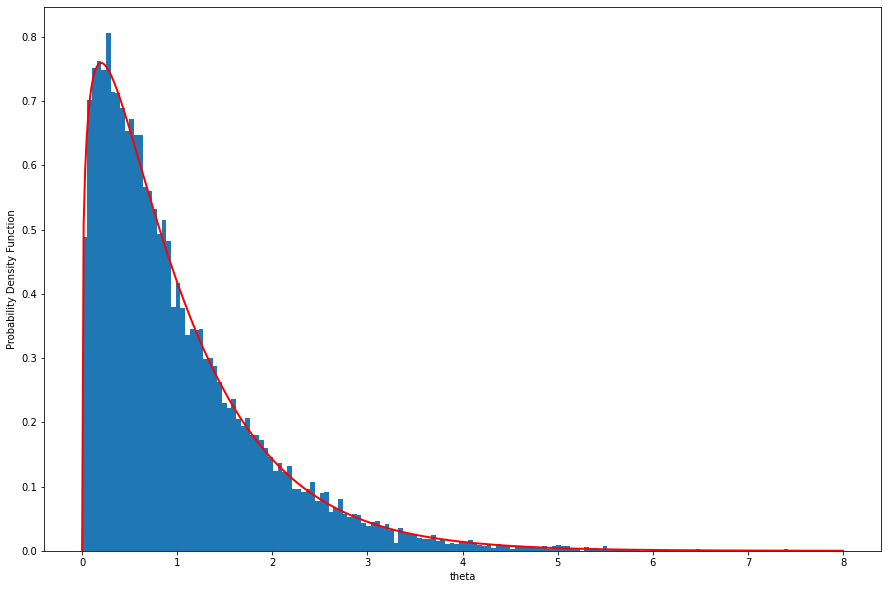

In [52]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

df=pd.DataFrame(out_gamma1.draws_pd())
plt.figure(figsize=(15,10))
plt.hist(df['theta'], bins=160, density=True)
plt.plot(xs, pdfs, linewidth=2, color='r')

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Constrained parameter

In [31]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/DA_2023/lab2/code_5.stan to exe file /home/DA_2023/lab2/code_5
INFO:cmdstanpy:compiled model executable: /home/DA_2023/lab2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)

chain 1 |██▏       | 00:01 Iteration: 1300 / 7000 [ 18%]  (Sampling)


chain 1 |██▌       | 00:01 Iteration: 1500 / 7000 [ 21%]  (Sampling)


chain 1 |██▊       | 00:02 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |██▉       | 00:02 Iteration: 1800 / 7000 [ 25%]  (Sampling)

chain 1 |███       | 00:02 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▏      | 00:02 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |███▎      | 00:03 Iteration: 2100 / 7000 [ 30%]  (Sampling)




chain 1 |███▍      | 00:03 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:03 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_2023/lab2/samples/code_5-20230318144156_1.csv, /home/DA_2023/lab2/samples/code_5-20230318144156_2.csv, /home/DA_2023/lab2/samples/code_5-20230318144156_3.csv, /home/DA_2023/lab2/samples/code_5-20230318144156_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

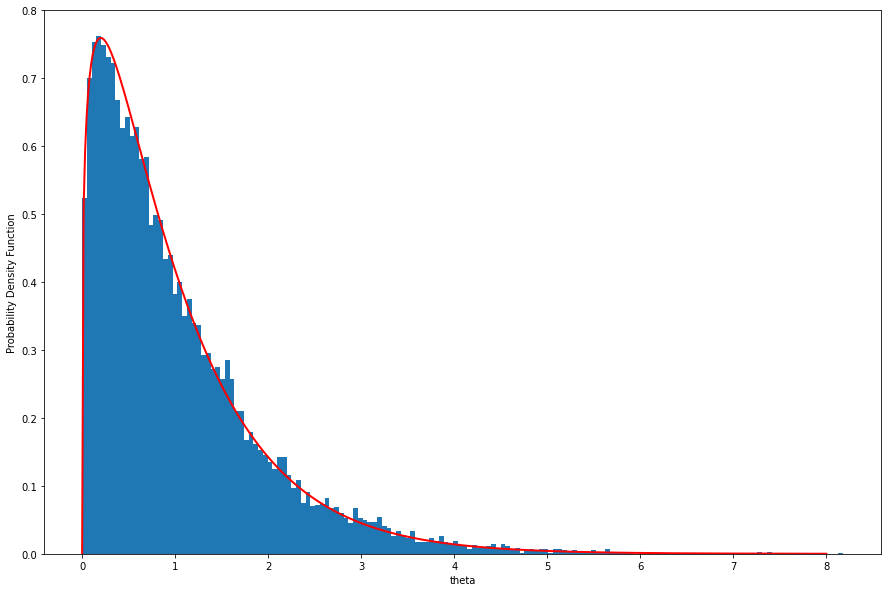

In [53]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

df=pd.DataFrame(out_gamma2.draws_pd())
plt.figure(figsize=(15,10))
plt.hist(df['theta'], bins=160, density=True)
plt.plot(xs, pdfs, linewidth=2, color='r')

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

While using constrained parameters there is almost no transition which ended with a divergence (only 0.01%). Whilie usong unconstrained parameters there are 40% of transitions endded with a divrgence.

## Excercise 4 - Selection of parameters using equation solving


In [62]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
print(r'Standard deviation: {0}'.format(tunes.stan_variable('sigma')[0]))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Standard deviation: 2.32935


## Excercise 5 - different methods of defining models


In [64]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 3102000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


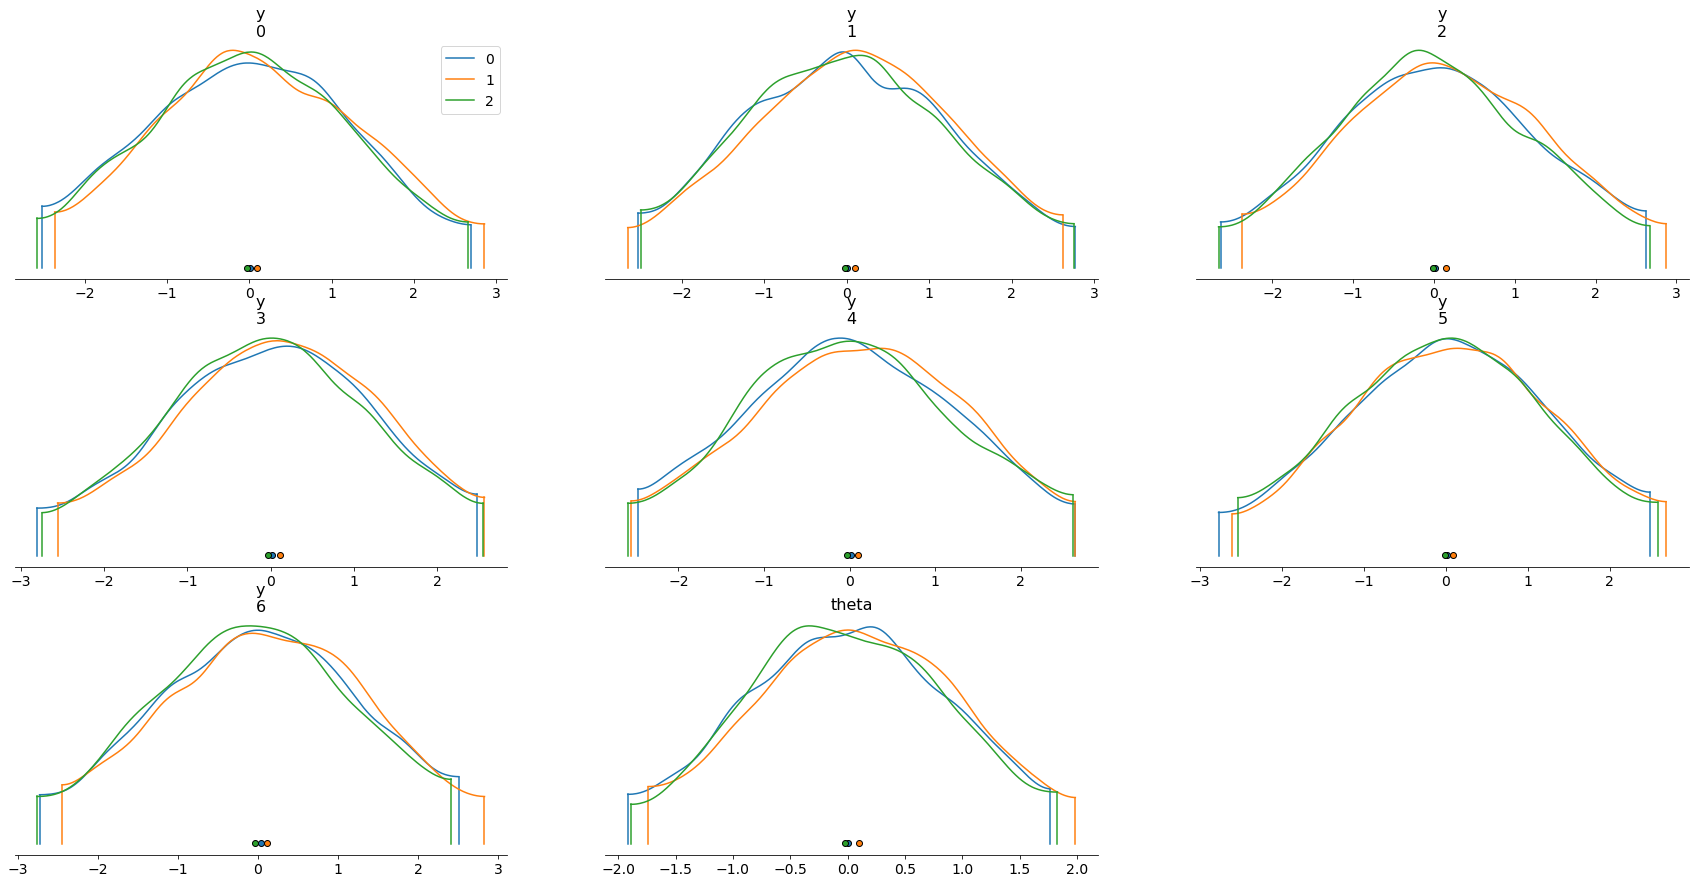

In [69]:
az.plot_density([result_1,result_2,result_3], figsize=(30,15))
plt.show()

## Excercise 6 - generated quantities post sampling


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing


array([<AxesSubplot:title={'center':'mean_y'}>], dtype=object)

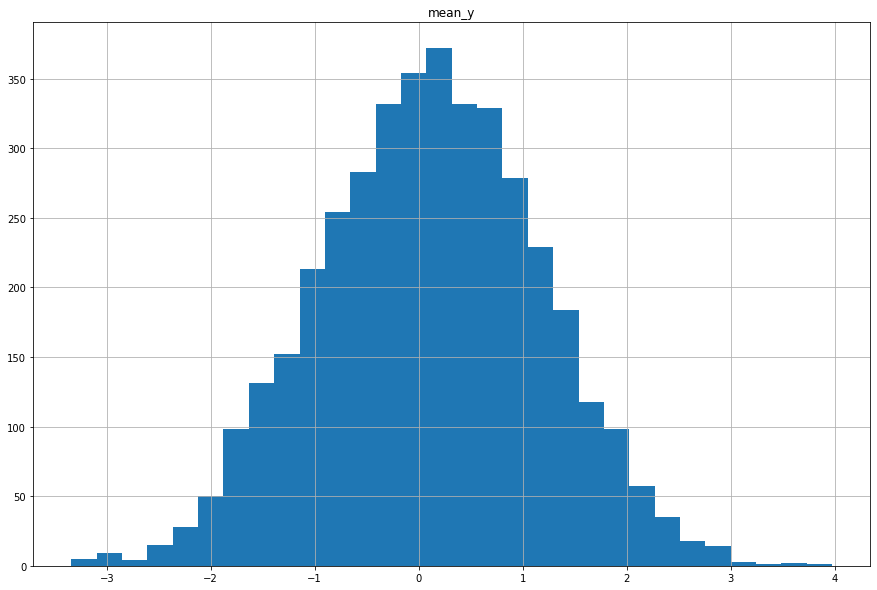

In [88]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variable
df = pd.DataFrame(mean_of_y.draws_pd())
figure, ax = plt.subplots(figsize=(15,10))
df.hist(bins=30, ax=ax)